## Arewa Data Science Academy
### Deep Learning Cohort2.0

#### Name: Umar Faruk Ibrahim
#### Email: ibrahimumarfaruk2000@gmail.com
#### Title: Week 2 Solution

# 01. Pytorch Workflow Fundamentals Exercise

## 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

In [1]:
import torch

weight = 0.3
bias = 0.9
start, end, step = 0, 2, 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [2]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

* Split the data into 80% training, 20% testing.

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

* Plot the training and testing data so it becomes visual.

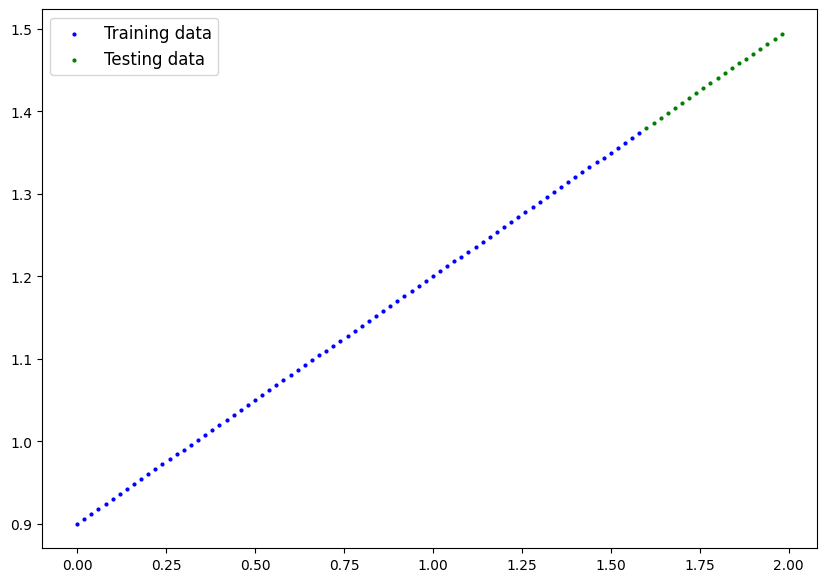

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

plt.legend(prop={"size": 12})
plt.show()

## 2. Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

In [5]:
from torch import nn
class MyLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

* Once you've constructed the model, make an instance of it and check its state_dict().

In [6]:
model = MyLinearRegressionModel()
model.state_dict()

OrderedDict([('weight', tensor([0.7560])), ('bias', tensor([0.3523]))])

## 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

In [7]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [9]:
epochs = 300
for epoch in range(epochs):

  model.train()
  y_pred = model(X_train)
  loss = loss_function(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_function(test_pred, y_test)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | MAE Training Loss: {loss.item()} | MAE Test Loss: {test_loss.item()}")


Epoch: 0 | MAE Training Loss: 0.23052294552326202 | MAE Test Loss: 0.2760787010192871
Epoch: 10 | MAE Training Loss: 0.21041667461395264 | MAE Test Loss: 0.2760787010192871
Epoch: 20 | MAE Training Loss: 0.19782094657421112 | MAE Test Loss: 0.34118375182151794
Epoch: 30 | MAE Training Loss: 0.18759886920452118 | MAE Test Loss: 0.34118375182151794
Epoch: 40 | MAE Training Loss: 0.17812082171440125 | MAE Test Loss: 0.33813685178756714
Epoch: 50 | MAE Training Loss: 0.16891245543956757 | MAE Test Loss: 0.33813685178756714
Epoch: 60 | MAE Training Loss: 0.15976950526237488 | MAE Test Loss: 0.3121980130672455
Epoch: 70 | MAE Training Loss: 0.1506364345550537 | MAE Test Loss: 0.3121980130672455
Epoch: 80 | MAE Training Loss: 0.14154577255249023 | MAE Test Loss: 0.27944475412368774
Epoch: 90 | MAE Training Loss: 0.1324508637189865 | MAE Test Loss: 0.27944475412368774
Epoch: 100 | MAE Training Loss: 0.12336021661758423 | MAE Test Loss: 0.24329301714897156
Epoch: 110 | MAE Training Loss: 0.1142

## 4. Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [15]:
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

y_preds[:10]

tensor([[1.3659],
        [1.3718],
        [1.3777],
        [1.3837],
        [1.3896],
        [1.3955],
        [1.4014],
        [1.4074],
        [1.4133],
        [1.4192]])

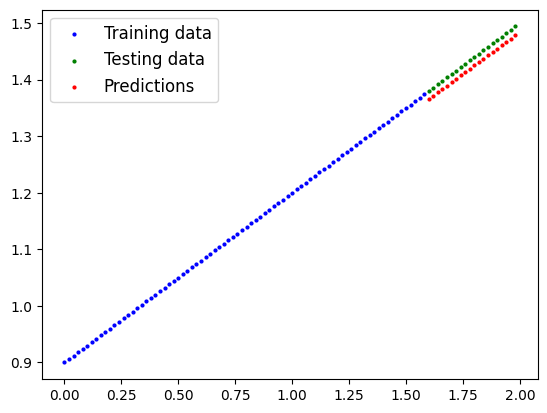

In [17]:
plt.scatter(X_train.cpu(), y_train.cpu(), c="b", s=4, label="Training data")
plt.scatter(X_test.cpu(), y_test.cpu(), c="g", s=4, label="Testing data")
plt.scatter(X_test.cpu(), y_preds.cpu(), c="r", s=4, label="Predictions")

plt.legend(prop={"size": 12})
plt.show()

## 5. Save your trained model's state_dict() to file.

In [18]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

model_name = "pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / model_name
print(f'Pytorch Workflow Model saving to: {MODEL_SAVE_PATH}')
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Pytorch Workflow Model saving to: models/pytorch_workflow_model.pth


* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

In [19]:
new_model = MyLinearRegressionModel()
new_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-19-de90452bab13>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [20]:
new_model.to(device)
with torch.inference_mode():
  new_model_preds = new_model(X_test)

y_preds == new_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])